## Imports and Environment Setup

In this section, we import all required libraries used throughout the notebook.
These include tools for data manipulation (`pandas`, `numpy`), preprocessing and machine learning (`scikit-learn`), visualization (`matplotlib`), and file system handling (`pathlib`).

The goal is to centralize all dependencies at the beginning for clarity and reproducibility.


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from pathlib import Path

## Output Directory for Figures

Here we define a dedicated directory to store all generated plots and visualizations.
Using `pathlib` ensures portability across operating systems, and the directory is created automatically if it does not already exist.


In [2]:
FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
columns_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

## Initial Data Exploration

The following cells inspect the dataset structure and contents, including:
- Dataset dimensions
- First and last rows
- Data types
- Missing values
- Duplicate records
- Class label distribution

This step ensures data quality before proceeding with preprocessing and modeling.


In [4]:
data = pd.read_csv('magic+gamma+telescope/magic04.data', sep=',', names=columns_name, header=None)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
data.shape

(19020, 11)

In [6]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
data.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [8]:
data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [9]:
data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(115)

In [11]:
data['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [12]:
feature_cols = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist'
]

In [13]:
X = data[feature_cols].copy()
y = data['class'].copy()

## Feature Standardization

Machine learning algorithms such as Isolation Forest and K-Means are sensitive to feature scales.
We standardize all numerical features using `StandardScaler` so that each feature has zero mean and unit variance.


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled.shape

(19020, 10)

## Anomaly Detection Using Isolation Forest

An Isolation Forest model is initialized and trained to detect outliers in the standardized feature space.
The model isolates anomalies by randomly partitioning the data, making it well-suited for high-dimensional datasets.


In [16]:
iso = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

In [17]:
outlier_pred = iso.fit_predict(X_scaled)

In [18]:
data['outlier'] = outlier_pred

## Outlier Labeling and Summary

Each data point is labeled as:
- `1` → inlier
- `-1` → outlier

We append these labels to the dataset and compute the number of detected outliers and inliers.


In [19]:
num_outliers = (outlier_pred == -1).sum()
num_inliers = (outlier_pred == 1).sum()

In [20]:
num_outliers

np.int64(381)

In [21]:
num_inliers

np.int64(18639)

## Distribution of Anomaly Scores

This section visualizes the anomaly scores produced by the Isolation Forest.
Higher scores indicate more anomalous observations.
The histogram helps assess the separation between normal points and outliers.


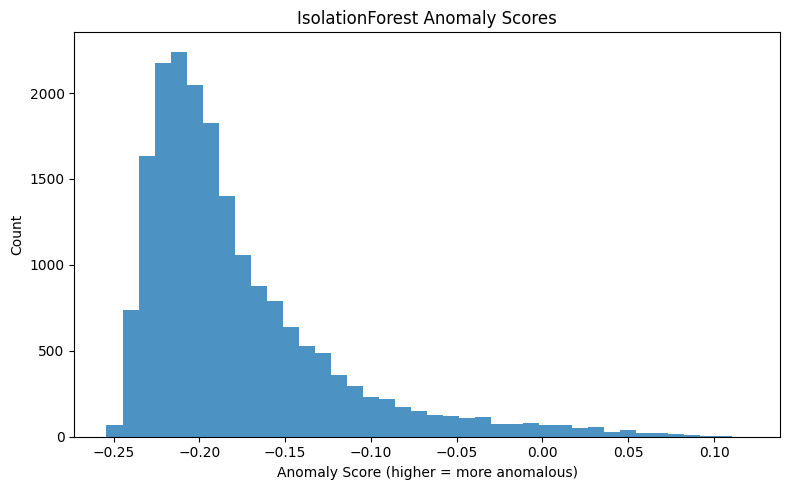

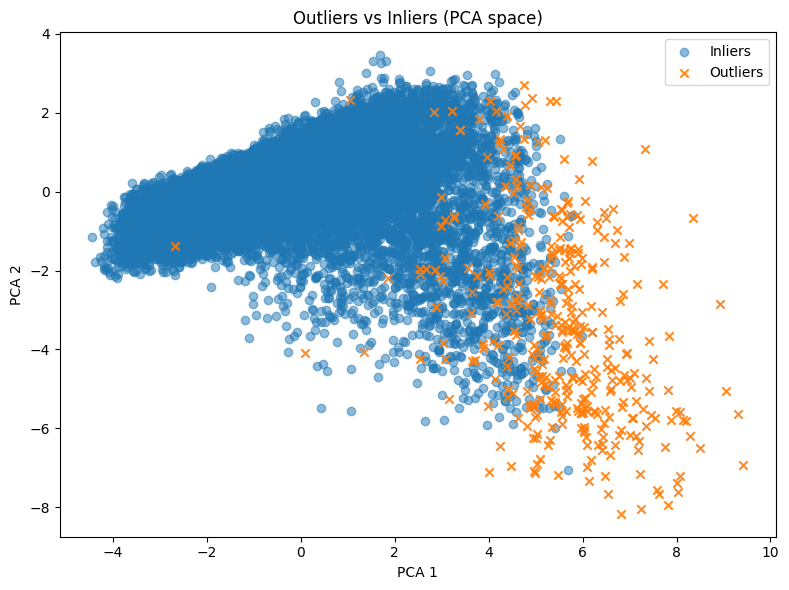

In [23]:
scores = -iso.decision_function(X_scaled)

plt.figure(figsize=(8,5))
plt.hist(scores, bins=40, alpha=0.8)
plt.xlabel("Anomaly Score (higher = more anomalous)")
plt.ylabel("Count")
plt.title("IsolationForest Anomaly Scores")
plt.tight_layout()
plt.savefig(FIG_DIR / "anomaly_score_hist.png", dpi=150)
plt.show()

pca_all = PCA(n_components=2).fit(X_scaled)
X_all_2d = pca_all.transform(X_scaled)
is_out = (outlier_pred == -1)

plt.figure(figsize=(8,6))
plt.scatter(X_all_2d[~is_out,0], X_all_2d[~is_out,1], alpha=0.5, label="Inliers")
plt.scatter(X_all_2d[is_out,0],  X_all_2d[is_out,1],  alpha=0.9, marker='x', label="Outliers")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Outliers vs Inliers (PCA space)")
plt.legend()
plt.tight_layout()
plt.savefig(FIG_DIR / "anomalies_pca2d.png", dpi=150)
plt.show()

In [24]:
mask_inliers = (outlier_pred == 1)
X_clean = X_scaled[mask_inliers]
y_clean = y[mask_inliers].reset_index(drop=True)
data_clean = data[mask_inliers].reset_index(drop=True)

In [25]:
X_clean.shape

(18639, 10)

In [26]:
Ks = range(2, 10)
inertias = []
sil_scores = []

In [27]:
for k in Ks:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels_k = kmeans.fit_predict(X_clean)

    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_clean, labels_k)
    sil_scores.append(sil)

In [28]:
for k, inertia, sil in zip(Ks, inertias, sil_scores):
    print(f'{k}: {inertia:.3f}, sil: {sil:.3f}')
print()

2: 108963.778, sil: 0.286
3: 93950.034, sil: 0.202
4: 82434.227, sil: 0.211
5: 75954.959, sil: 0.203
6: 70409.232, sil: 0.203
7: 66453.075, sil: 0.167
8: 63070.046, sil: 0.173
9: 60671.826, sil: 0.158



## Cluster Evaluation Plots

The Elbow plot shows how inertia decreases as K increases.
The Silhouette plot shows how well-separated the clusters are.

Together, these plots guide the selection of the optimal number of clusters.


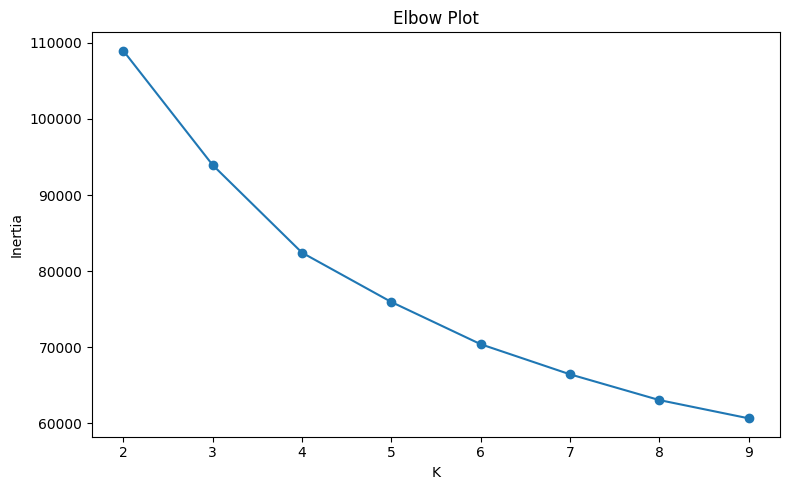

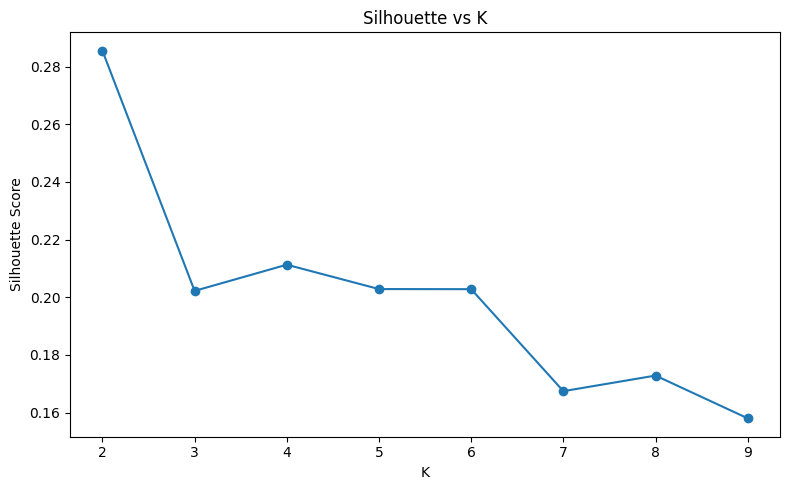

In [29]:
plt.figure(figsize=(8,5))
plt.plot(list(Ks), inertias, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Plot")
plt.tight_layout()
plt.savefig(FIG_DIR / "kmeans_elbow.png", dpi=150)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(list(Ks), sil_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs K")
plt.tight_layout()
plt.savefig(FIG_DIR / "kmeans_silhouette.png", dpi=150)
plt.show()


In [30]:
best_k = 2

In [31]:
kmeans_final = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)

In [32]:
cluster_labels = kmeans_final.fit_predict(X_clean)

In [33]:
data_clean['cluster'] = cluster_labels

In [34]:
print("Cluster counts:")
print(pd.Series(cluster_labels).value_counts())

Cluster counts:
1    10350
0     8289
Name: count, dtype: int64


## PCA Projection of Outliers and Inliers

To visually inspect anomalies, we project the full dataset into two dimensions using PCA.
Outliers and inliers are highlighted with different markers to evaluate their separation in reduced space.


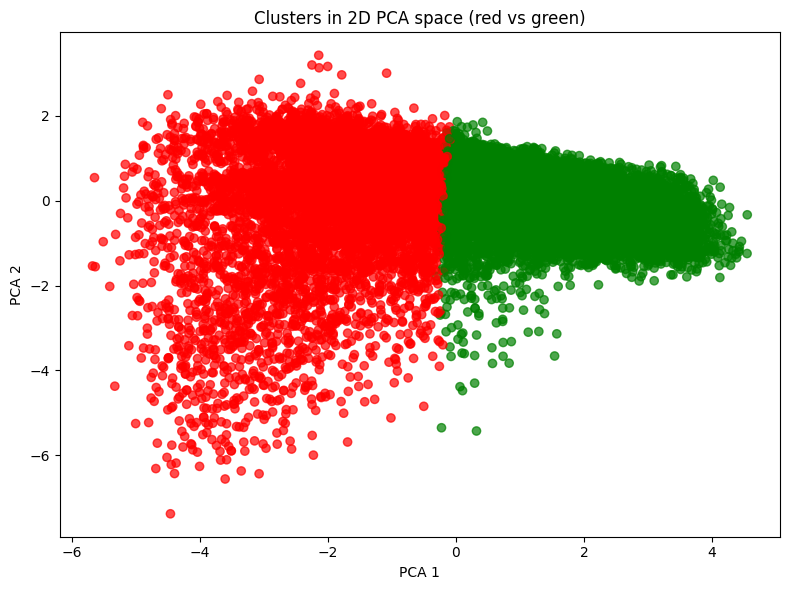

In [35]:
# %%  (REPLACE EXISTING CLUSTER PCA PLOT CELL)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

color_map = {0: "red", 1: "green"}  # keep your color choice
colors = [color_map[c] for c in cluster_labels]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters in 2D PCA space (red vs green)")
plt.tight_layout()
plt.savefig(FIG_DIR / "clusters_pca2d.png", dpi=150)
plt.show()


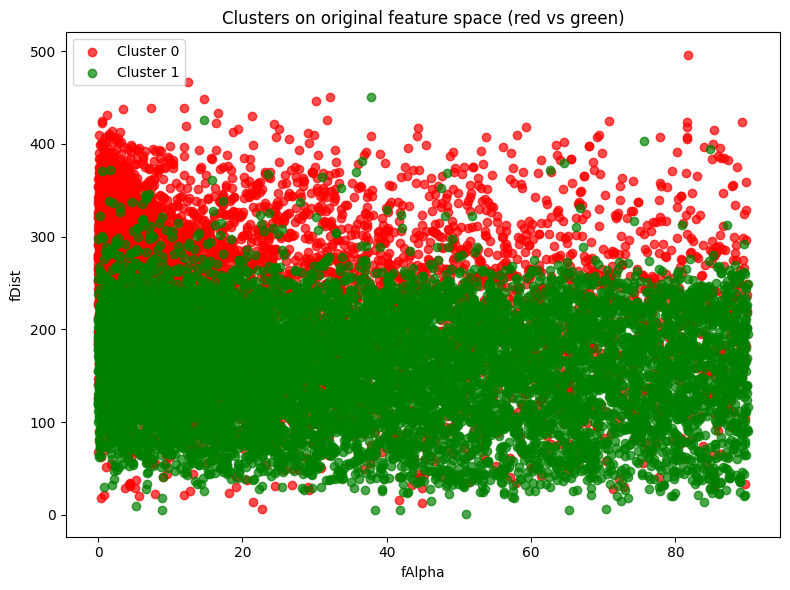

In [36]:
plt.figure(figsize=(8, 6))
color_map = {0: "red", 1: "green"}

for cl, col in color_map.items():
    mask = (data_clean['cluster'] == cl)
    plt.scatter(
        data_clean.loc[mask, 'fAlpha'],
        data_clean.loc[mask, 'fDist'],
        c=col,
        alpha=0.7,
        label=f"Cluster {cl}"
    )

plt.xlabel("fAlpha")
plt.ylabel("fDist")
plt.title("Clusters on original feature space (red vs green)")
plt.legend()
plt.tight_layout()
plt.savefig(FIG_DIR / "clusters_fAlpha_fDist.png", dpi=150)
plt.show()


In [37]:
print("Cluster vs class (counts):")
print(pd.crosstab(data_clean['cluster'], y_clean), "\n")

Cluster vs class (counts):
class       g     h
cluster            
0        5523  2766
1        6798  3552 



In [38]:
print("Cluster vs class (row-normalized):")
print(pd.crosstab(data_clean['cluster'], y_clean, normalize='index'))

Cluster vs class (row-normalized):
class           g         h
cluster                    
0        0.666305  0.333695
1        0.656812  0.343188


## Frequent Itemset & Association Rule Mining

In [39]:
data_disc = data_clean.copy()

n_bins = 3
labels = ['low', 'medium', 'high']

for col in feature_cols:
    data_disc[col] = pd.qcut(data_disc[col], q=n_bins, labels=labels)


In [40]:
data_disc['class'] = data_disc['class'].map({'g': 'gamma', 'h': 'hadron'})

In [41]:
transactions_df = pd.get_dummies(data_disc.astype(str))

In [42]:
transactions_df.head()

,fLength_high,fLength_low,fLength_medium,fWidth_high,fWidth_low,fWidth_medium,fSize_high,fSize_low,fSize_medium,fConc_high,...,fAlpha_low,fAlpha_medium,fDist_high,fDist_low,fDist_medium,class_gamma,class_hadron,outlier_1,cluster_0,cluster_1
0,False,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,True
1,False,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,True,False,True,False,True
2,False,True,False,False,True,False,False,True,False,True,...,False,True,False,True,False,True,False,True,False,True
3,True,False,False,True,False,False,True,False,False,False,...,True,False,True,False,False,True,False,True,True,False
4,False,False,True,True,False,False,False,False,True,False,...,True,False,True,False,False,True,False,True,True,False


In [43]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18639 entries, 0 to 18638
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   fLength_high     18639 non-null  bool 
 1   fLength_low      18639 non-null  bool 
 2   fLength_medium   18639 non-null  bool 
 3   fWidth_high      18639 non-null  bool 
 4   fWidth_low       18639 non-null  bool 
 5   fWidth_medium    18639 non-null  bool 
 6   fSize_high       18639 non-null  bool 
 7   fSize_low        18639 non-null  bool 
 8   fSize_medium     18639 non-null  bool 
 9   fConc_high       18639 non-null  bool 
 10  fConc_low        18639 non-null  bool 
 11  fConc_medium     18639 non-null  bool 
 12  fConc1_high      18639 non-null  bool 
 13  fConc1_low       18639 non-null  bool 
 14  fConc1_medium    18639 non-null  bool 
 15  fAsym_high       18639 non-null  bool 
 16  fAsym_low        18639 non-null  bool 
 17  fAsym_medium     18639 non-null  bool 
 18  fM3Lon

In [44]:
from mlxtend.frequent_patterns import apriori, association_rules

In [45]:
frequent_itemsets = apriori(
    transactions_df,
    min_support=0.05,
    use_colnames=True
)

frequent_itemsets.sort_values('support', ascending=False).head(10)

,support,itemsets
32,1.000000,(outlier_1)
30,0.661033,(class_gamma)
533,0.661033,"(outlier_1, class_gamma)"
540,0.555287,"(cluster_1, outlier_1)"
34,0.555287,(cluster_1)
33,0.444713,(cluster_0)
539,0.444713,"(outlier_1, cluster_0)"
535,0.364719,"(cluster_1, class_gamma)"
2559,0.364719,"(cluster_1, outlier_1, class_gamma)"
536,0.338967,"(class_hadron, outlier_1)"


In [46]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6
)

rules.head()

C:\Users\LEGiON\AppData\Roaming\Python\Python314\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(fLength_high),(fWidth_high),0.333333,0.333333,0.250335,0.751006,2.253018,1.0,0.139224,2.677440,0.834226,0.601289,0.626509,0.751006
1,(fWidth_high),(fLength_high),0.333333,0.333333,0.250335,0.751006,2.253018,1.0,0.139224,2.677440,0.834226,0.601289,0.626509,0.751006
2,(fLength_high),(fSize_high),0.333333,0.333226,0.255218,0.765653,2.297698,1.0,0.144142,2.845238,0.847173,0.620451,0.648536,0.765776
3,(fSize_high),(fLength_high),0.333226,0.333333,0.255218,0.765899,2.297698,1.0,0.144142,2.847776,0.847036,0.620451,0.648849,0.765776
4,(fLength_high),(fConc_low),0.333333,0.333441,0.243897,0.731692,2.194368,1.0,0.132750,2.484303,0.816432,0.576757,0.597473,0.731574


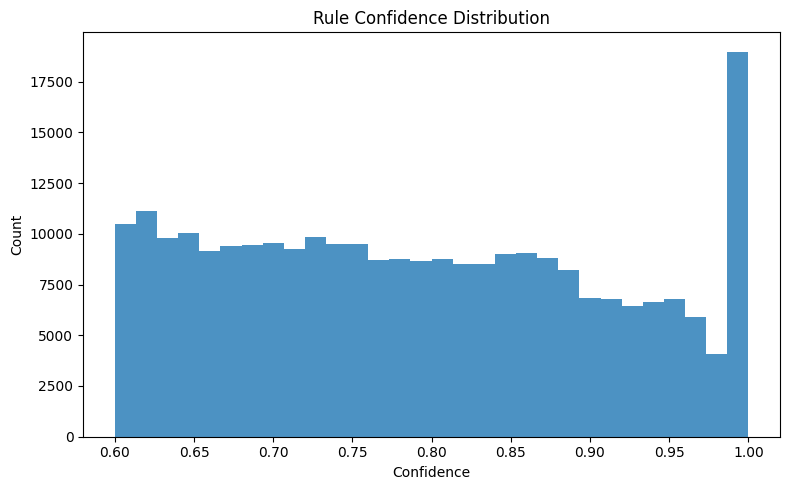

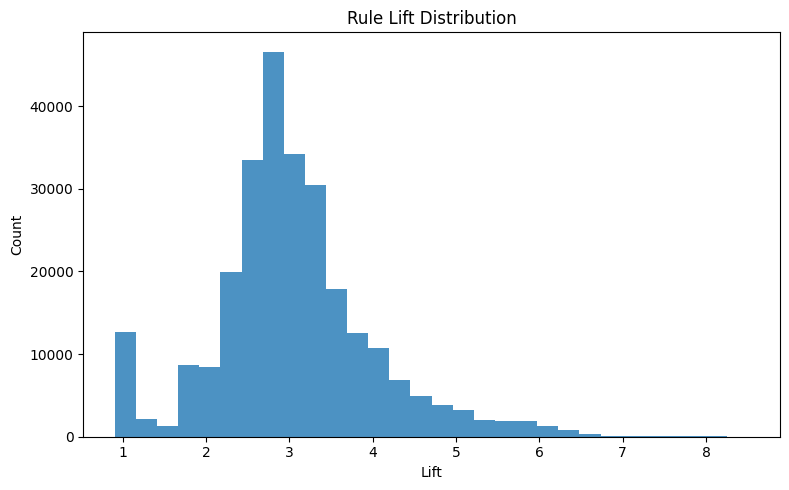

In [47]:
plt.figure(figsize=(8,5))
plt.hist(rules['confidence'], bins=30, alpha=0.8)
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.title("Rule Confidence Distribution")
plt.tight_layout()
plt.savefig(FIG_DIR / "rules_confidence_hist.png", dpi=150)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(rules['lift'], bins=30, alpha=0.8)
plt.xlabel("Lift")
plt.ylabel("Count")
plt.title("Rule Lift Distribution")
plt.tight_layout()
plt.savefig(FIG_DIR / "rules_lift_hist.png", dpi=150)
plt.show()


## Association Rule Network Visualization

High-confidence and high-lift rules are visualized as a directed network graph.
Nodes represent items, and edges represent association rules, with edge width reflecting confidence.


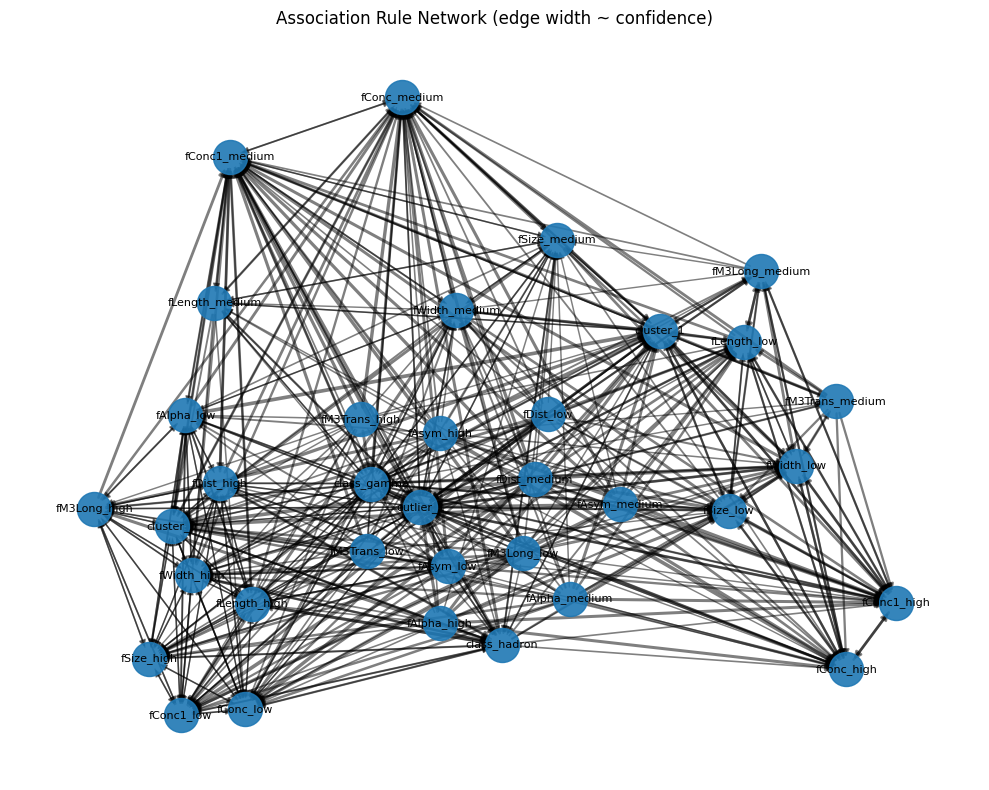

In [48]:
import networkx as nx

rules_net = rules[(rules['confidence'] >= 0.7) & (rules['lift'] >= 1.2)].copy()

G = nx.DiGraph()
for _, r in rules_net.iterrows():
    ants = [str(a) for a in r['antecedents']]
    cons = [str(c) for c in r['consequents']]
    for a in ants:
        for c in cons:
            G.add_edge(a, c, weight=r['lift'], confidence=r['confidence'])

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42, k=0.4)
edge_w = [1 + 2*(d['confidence']-0.7)/(1.0-0.7) if d['confidence'] < 1 else 3
          for _,_,d in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=600, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True, width=edge_w, alpha=0.5)
plt.title("Association Rule Network (edge width ~ confidence)")
plt.axis('off')
plt.tight_layout()
plt.savefig(FIG_DIR / "association_network.png", dpi=150)
plt.show()


In [49]:
rules_class = rules[
    rules['consequents'].astype(str).str.contains('class_')
].sort_values('lift', ascending=False)

rules_class.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
139493,"(fAlpha_high, fConc1_low, fLength_high)","(fConc_low, class_hadron, outlier_1, cluster_0)",0.057836,0.107409,0.052846,0.913729,8.506992,1.0,0.046634,10.346375,0.936620,0.470167,0.903348,0.702869
139476,"(fAlpha_high, fConc1_low, fLength_high, outlie...","(fConc_low, class_hadron, cluster_0)",0.057836,0.107409,0.052846,0.913729,8.506992,1.0,0.046634,10.346375,0.936620,0.470167,0.903348,0.702869
67939,"(fAlpha_high, fConc1_low, fLength_high)","(fConc_low, class_hadron, cluster_0)",0.057836,0.107409,0.052846,0.913729,8.506992,1.0,0.046634,10.346375,0.936620,0.470167,0.903348,0.702869
67945,"(fAlpha_high, fLength_high, fConc_low)","(fConc1_low, class_hadron, cluster_0)",0.058801,0.106122,0.052846,0.898723,8.468802,1.0,0.046606,8.826043,0.937018,0.471517,0.886699,0.698350
139488,"(fAlpha_high, fLength_high, outlier_1, fConc_low)","(fConc1_low, class_hadron, cluster_0)",0.058801,0.106122,0.052846,0.898723,8.468802,1.0,0.046606,8.826043,0.937018,0.471517,0.886699,0.698350
139500,"(fAlpha_high, fLength_high, fConc_low)","(fConc1_low, class_hadron, outlier_1, cluster_0)",0.058801,0.106122,0.052846,0.898723,8.468802,1.0,0.046606,8.826043,0.937018,0.471517,0.886699,0.698350
139474,"(fAlpha_high, fConc1_low, fLength_high, cluste...","(fConc_low, class_hadron, outlier_1)",0.056602,0.110575,0.052846,0.933649,8.443614,1.0,0.046587,13.404911,0.934459,0.462224,0.925400,0.705786
139462,"(fConc1_low, fLength_high, cluster_0, fAlpha_h...","(fConc_low, class_hadron)",0.056602,0.110575,0.052846,0.933649,8.443614,1.0,0.046587,13.404911,0.934459,0.462224,0.925400,0.705786
67930,"(fAlpha_high, fConc1_low, fLength_high, cluste...","(fConc_low, class_hadron)",0.056602,0.110575,0.052846,0.933649,8.443614,1.0,0.046587,13.404911,0.934459,0.462224,0.925400,0.705786
177425,"(fAlpha_high, fConc_low, cluster_0)","(fConc1_low, fSize_high, class_hadron, outlier_1)",0.068029,0.093245,0.053061,0.779968,8.364690,1.0,0.046717,4.121021,0.944718,0.490332,0.757342,0.674507


## Top Frequent Itemsets

The most frequent itemsets are visualized to highlight dominant patterns in the dataset.


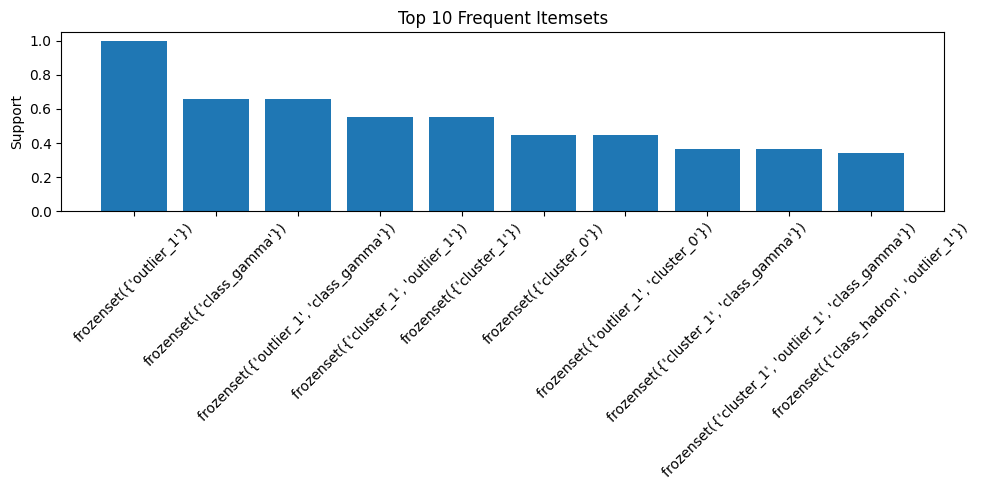

In [50]:
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)
labels_txt = top_itemsets['itemsets'].astype(str)

plt.figure(figsize=(10, 5))
plt.bar(range(len(top_itemsets)), top_itemsets['support'])
plt.xticks(range(len(top_itemsets)), labels_txt, rotation=45)
plt.ylabel("Support")
plt.title("Top 10 Frequent Itemsets")
plt.tight_layout()
plt.savefig(FIG_DIR / "top10_itemsets.png", dpi=150)
plt.show()


## Support vs Confidence Trade-off

A scatter plot illustrates the relationship between rule support and confidence, helping identify strong and reliable rules.


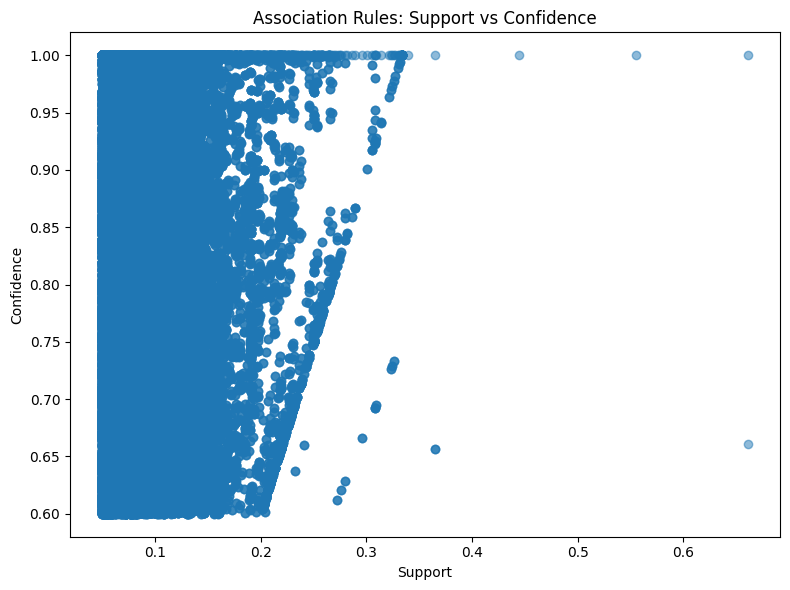

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.tight_layout()
plt.savefig(FIG_DIR / "rules_support_vs_confidence.png", dpi=150)
plt.show()
